<a href="https://colab.research.google.com/github/Megha-Hebbal/Simplex-Algorithm/blob/main/Simplex_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem: Farming Production Optimization**
A farmer has recently acquired an **110 hectares** piece of land. He has decided to grow **Wheat** and **Barley** on that land. Due to the quality of the soil and the region’s excellent climate, the entire production of Wheat and Barley can be sold. The costs, net profits and labor requirements are shown in the table below.

<br>

| Variety   | Cost (Price/Hec) | Net Profit (Price/Hec) | Man-days/Hec |
| :---------| ---------------: | ---------------------: | -----------: |
| Wheat     | 100              | 50                     | 10           |
| Barley    | 200              | 120                    | 30           |

<br>

* The farmer has a budget of US $10,000.
* The farmer has an availability of 1,200 man-days during the planning horizon.

<br>

###**Objective** <br>
He wants to know how to plant each variety in the 110 hectares, given the costs, net profits and labor requirements according to the data shown above inorder to maximise the profit. Find the optimal solution and the optimal value.

## **Simplex algorithm**
In mathematical optimization, Dantzig's simplex algorithm (or simplex method) is a popular algorithm for linear programming. The question posed above belongs to linear programming and hence we will be solving it using the Simplex algorithm.



### Definitions and procedure


* A linear programming question consists of 4 parts: **Objective function** (that needs to be maximised or minimised), **Decision variables**, **Linear constraints** and **Non-negativity constraints**
* The linear constraints give us a feasible region which is called the **polyhedron**.
* The main idea behind the algorithm is based on the following property. If there is a solution to the problem, it can be found on one of the **vertices** of the constraint polyhedron.

* The simplex algorithm moves from one vertex to another vertex of the constraint polyhedron. It maintains at each iteration a list of the indices of the basic variables.
* At each iteration, one variable which is out of the basis is selected
in order to enter the basis. It is associated with a basic direction, which is a descent direction (since this is a minimising algorithm).
* This basic direction is followed all the way until we hit a constraint (the next vertex). This constraint will be activated, and the associated variable, which was in the basis before, will leave the basis.
* And then, we have a new set of indices, and we are ready to start the new iteration, if the algorithm proceeds.
* There are two ways to interrupt this algorithm:
    * One: we don't find any descent direction among the basic directions, in other words, along each basic direction the objective function is going up (all the reduced costs are non negative). In this case, we have found an optimal solution.
    * Two: When we find a direction where all the components are infinity. In this case, the problem is unbounded, and we can stop the iterations.

## **Formulate the problem into standard form**

Let my **decison variables** be:
* x<sub>1</sub> = Total area for growing Wheat (in hectares)
* x<sub>2</sub> = Total area for growing Barley (in hectares)

<br>

**Objective Function**: <br>
Maximize z = 50x<sub>1</sub> + 120x<sub>2</sub>

<br>

Subject to the following **constraints**:
* We have an upper cap on the total cost spent by the farmer: 100x<sub>1</sub> + 200x<sub>2</sub> ≤ 10,000
* We have an upper cap on the availability on the total number of man-days for planning horizon: 10x<sub>1</sub> + 30x<sub>2</sub> ≤ 1200
* Third constraint is the total area present for plantation: x<sub>1</sub> + x<sub>2</sub> ≤ 110
* Non-negativity constraints (you cannot have a negative plantation area): x<sub>1</sub> ≥ 0, x<sub>2</sub> ≥ 0

The feasible solutions are given by the shaded region below:
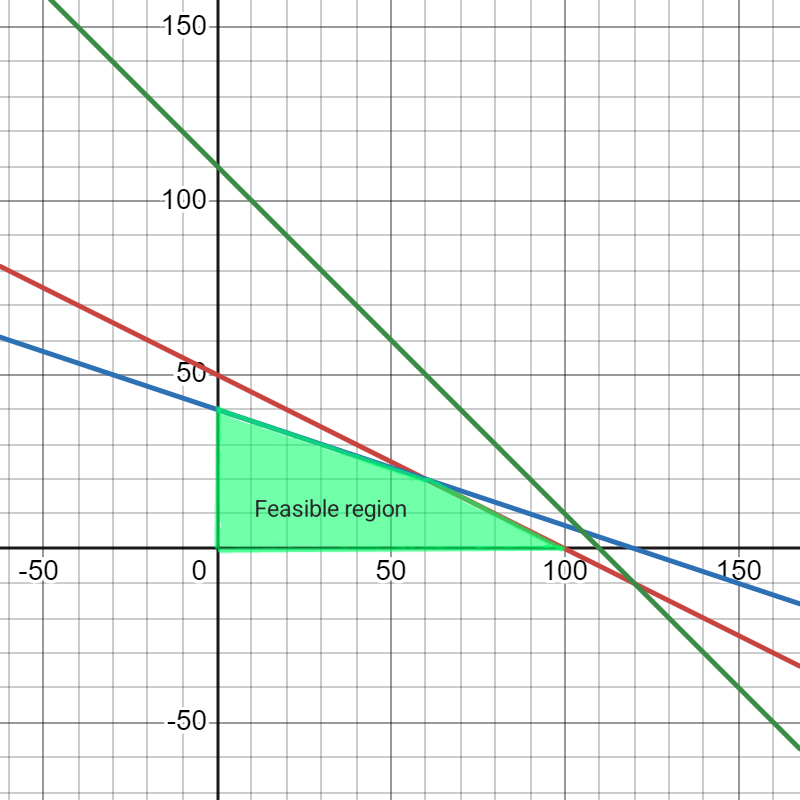

<br>

**Introducing Slack variables**

Constraints:
<center>
$$100x_1 + 200x_2 + s_1 = 10,000$$
<br>
$$10x_1 + 30x_2 + s_2 = 1200$$
<br>
$$x_1 + x_2 + s_3 = 110$$
<br>
$$x_1 ≥ 0, x_2 ≥ 0, s_1 ≥ 0, s_2 ≥ 0, s_3 ≥ 0$$
</center>

Objective function (Minimize) <center> $$z = -50x_1 - 120x_2 + 0s_1+ 0s_2+ 0s_3$$</center>

<br>

**Matrix Representation**
<center> Minimize $$c^Tx$$ <br>
Subject to constraints $$Ax = b, x ≥ 0$$ <br>
$$A ∈ \mathbb{R}^{m\times n}, b ∈ \mathbb{R}^{m\times 1}, c ∈ \mathbb{R}^{n\times 1}, x ∈ \mathbb{R}^{n\times 1} $$</center>
where
$$ c^Tx =
\left(\begin{array}{cc}
-50 & -120 & 0 & 0 & 0\\
\end{array}\right)
\left(\begin{array}{cc}
x_1\\
x_2\\
s_1\\
s_2\\
s_3
\end{array}\right)
$$
<br>
$$ Ax =
\left(\begin{array}{cc}
100 & 200 & 1 & 0 & 0\\
10 & 30 & 0 & 1 & 0\\
1 & 1 & 0 & 0 & 1
\end{array}\right)
\left(\begin{array}{cc}
x_1\\
x_2\\
s_1\\
s_2\\
s_3
\end{array}\right) =
\left(\begin{array}{cc}
10,000\\
1200\\
110\\
\end{array}\right) = b
$$



## **Code Implementation of Simplex Algorithm**

In [21]:
import numpy as np

def simplex(A, b, c):
  """
  Minimizing implementation of Simplex algorithm for linear programming.

  :param A: m x n matrix
  :type A: numpy.array 2D
  :param b: m vector
  :type b: numpy.array 1D
  :param c: n vector
  :type c: numpy.array 1D

  :return optsoln: Optimal solution
  :type optsoln: numpy.array 1D
  :return unbounded: If the objective function is unbounded
  :type unbounded: boolean
  :return optvalue: Optimal value of objective function at optimal solution
  :type optvalue: float
  """

  # Extracting the dimension of the problem and checking for compatibility
  m, n = A.shape
  if b.shape[0] != m:
    raise Exception(f'Incompatible sizes: A is {m}x{n}, b is of length {b.shape[0]}, and should be {m}')
  if c.shape[0] != n:
    raise Exception(f'Incompatible sizes: A is {m}x{n}, c is of length {c.shape[0]}, and should be {n}')

  # Initialization
  optvalue = np.inf
  stop = False
  Index_Enter = -1
  Index_Exit = -1
  basis = [i for i in range(n-m,n)]

  # Iterating through the vertices
  while not stop:

    # Extract the basis matrix
    B = A[:, basis]
    # Calculate the value of the basic variables (xb=B^-1@b)
    xb = np.linalg.solve(B,b)

    # Each column of the matrix d(mxn) is the dB vector of the corresponding index (dB=-B^-1.Aj)
    minusd = np.linalg.solve(B,A)

    # Calculation of the reduced costs vector(1xn) where each element is the reduced cost value associated with that variable
    reducedCost = c.T - c[basis].T @ minusd     # @ is matrix multiplication

    # Identify the negative reduced costs
    negativeReducedCost = reducedCost < 0       # checks each element in the array. The result is a boolean array where each entry is either T/F

    # When you have reached the optimal solution i.e., if along every direction
    # the function is going going up
    if not negativeReducedCost.any():           # check whether any of the elements in the negativeReducedCost array are True
      optimalbasis = basis
      unbounded = False
      stop = True
      optvalue = c[basis].T @ xb
      break

    else:
      # To find the index of the most negative reduced cost.
      # It is the index of the variable that will enter the basis.
      MinRC=np.inf
      for i in range(len(reducedCost)):
        if(MinRC > reducedCost[i]):
         MinRC = reducedCost[i]
         Index_Enter = i

      # Calculate the maximum step that can be taken along the basic direction d[Index_Enter]
      steps = np.array([xb[k] / minusd[k][Index_Enter] if minusd[k][Index_Enter] > 0 else np.inf for k in range(m)])
      Index_Exit = np.argmin(steps)
      step = steps[Index_Exit]

      if step == np.inf:
        # The problem is unbounded
        optimalbasis = np.zeros((m,1))
        unbounded = True
        stop = True
        break

      else:
        # Variable with index Index_Exit is replaced by variable with index Index_Enter in the basis.
        basis[Index_Exit] = Index_Enter

  # Formatting the optimal solution
  optsoln = np.zeros((n,1))
  j = 0
  for i in basis:
    optsoln[i] = xb[j]
    j = j + 1

  return optsoln, unbounded, optvalue

## **Applying it to the given problem**

In [30]:
A = np.array([[100, 200, 1, 0, 0], [10, 30, 0, 1, 0], [1, 1, 0, 0, 1]])
b = np.array([10000, 1200, 110])
c = np.array([-50, -120, 0, 0, 0])
optsoln, unbounded, optvalue = simplex(A, b, c)
print(f'To maximize profits the farmer should produce Wheat in {optsoln[0][0]} hectares and Barley in {optsoln[1][0]} hectares of land')
print(f'The maximum profit he can make is ${-optvalue}')

To maximize profits the farmer should produce Wheat in 60.0 hectares and Barley in 20.0 hectares of land
The maximum profit he can make is $5400.0
